<a href="https://colab.research.google.com/github/mohrael/Machine-Learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

            exam1       exam2    decision
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


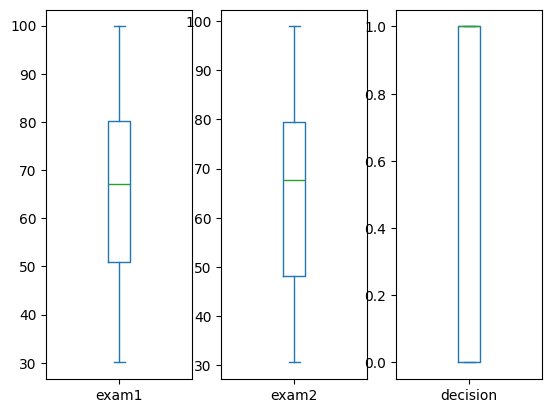

In [40]:
#step 1
data = pd.read_csv('/content/acceptance_data.txt',names=['exam1','exam2','decision'])

print(data.describe())
data.plot(kind='box',subplots=True)
plt.show()

In [41]:
x = data.drop(columns=['decision']).round(2)
y = data['decision']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# normalization
x_min = x_train.min()
x_max = x_train.max()
x_train = (x_train - x_min) / (x_max - x_min)
x_test = (x_test - x_min) / (x_max - x_min)



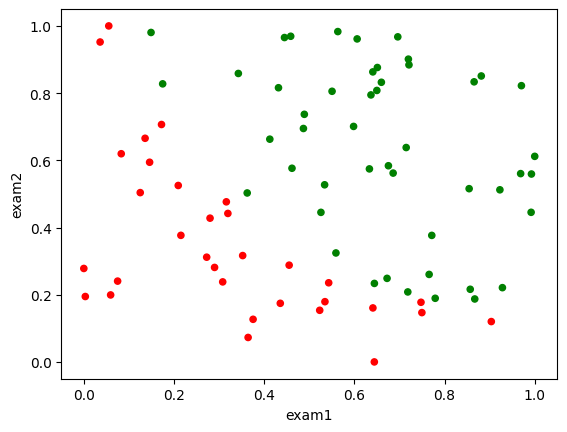

In [42]:
# for visuallization only
getColor = lambda x : 'red' if x==0 else 'green'
color = list(map(getColor,y_train))
x_train.plot(kind='scatter',x='exam1',y='exam2',c=color)
plt.show()

In [43]:
x_train_df = x_train.copy()
y_train_df = y_train.copy()

x_train = x_train.to_numpy().reshape((-1,2))
x_test = x_test.to_numpy().reshape((-1,2))
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [44]:
#step 3
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3 , algorithm='brute')
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=3)

In [45]:
#step 4
y_pred = model.predict(x_test)
print("Accuracy of KNN: ",model.score(x_test,y_test))


Accuracy of KNN:  0.8


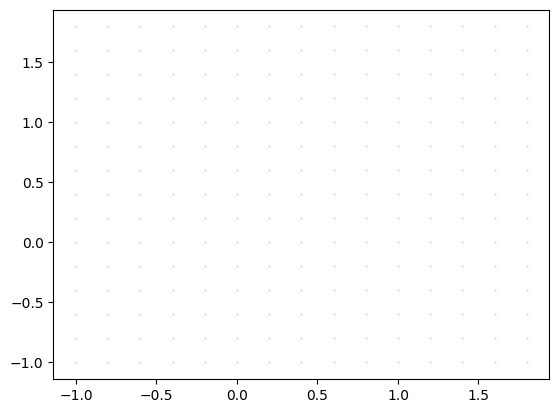

In [46]:
x1_min, x1_max = x_train_df['exam1'].min() - 1, x_train_df['exam1'].max() + 1
x2_min, x2_max = x_train_df['exam2'].min() - 1, x_train_df['exam2'].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2), np.arange(x2_min, x2_max, 0.2))
plt.scatter(x1, x2, s=0.02)
plt.show()

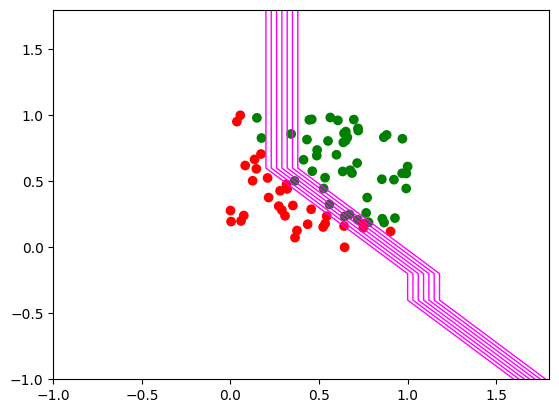

0.925

In [48]:
xx = np.stack((x1.ravel(),x2.ravel()),axis=1)
yy = model.predict(xx)


plt.contour(x1, x2, yy.reshape((x1.shape[0],x2.shape[1])), linewidths=1, colors='magenta')
color = list(map(getColor, y_train_df))
plt.scatter(x=x_train_df['exam1'], y=x_train_df['exam2'], c=color)
plt.show()